In [2]:
# original alexnet
import torchvision.models as models
import torch
from pprint import pprint
import torchsummary

use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

model = models.alexnet(pretrained=False,num_classes=100).to(device)
# model = AlphaAlexNet(num_classes=100).to(device)
model.train()

torchsummary.summary(model,input_size=(3,224,224),batch_size=64)

# CUDA_VISIBLE_DEVICES=5,6 python train_alexnet.py --epochs 14
# Test set: Average loss: 0.0025, Accuracy: 4305/10000 (43%)
# Elapsed Time: 2013.083889245987

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 64, 55, 55]          23,296
              ReLU-2           [64, 64, 55, 55]               0
         MaxPool2d-3           [64, 64, 27, 27]               0
            Conv2d-4          [64, 192, 27, 27]         307,392
              ReLU-5          [64, 192, 27, 27]               0
         MaxPool2d-6          [64, 192, 13, 13]               0
            Conv2d-7          [64, 384, 13, 13]         663,936
              ReLU-8          [64, 384, 13, 13]               0
            Conv2d-9          [64, 256, 13, 13]         884,992
             ReLU-10          [64, 256, 13, 13]               0
           Conv2d-11          [64, 256, 13, 13]         590,080
             ReLU-12          [64, 256, 13, 13]               0
        MaxPool2d-13            [64, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [64, 25

In [3]:
# original alexnet
import torchvision.models as models
import torch
from pprint import pprint
import torchsummary
from util.trainingutil import AlphaAlexNet

use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

# model = models.alexnet(pretrained=False,num_classes=100).to(device)
model = AlphaAlexNet(num_classes=100).to(device)
model.train()

torchsummary.summary(model,input_size=(4,224,224),batch_size=64)

# Input size (MB): 49.00
# Forward/backward pass size (MB): 535.80
# Params size (MB): 219.04
# Estimated Total Size (MB): 803.84



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 64, 55, 55]          31,040
              ReLU-2           [64, 64, 55, 55]               0
         MaxPool2d-3           [64, 64, 27, 27]               0
            Conv2d-4          [64, 192, 27, 27]         307,392
              ReLU-5          [64, 192, 27, 27]               0
         MaxPool2d-6          [64, 192, 13, 13]               0
            Conv2d-7          [64, 384, 13, 13]         663,936
              ReLU-8          [64, 384, 13, 13]               0
            Conv2d-9          [64, 256, 13, 13]         884,992
             ReLU-10          [64, 256, 13, 13]               0
           Conv2d-11          [64, 256, 13, 13]         590,080
             ReLU-12          [64, 256, 13, 13]               0
        MaxPool2d-13            [64, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [64, 25

In [ ]:
# CUDA_VISIBLE_DEVICES=5,6 python train_alexnet.py

In [ ]:
# CIFA100 with Alex 4 Channel
# Test set: Average loss: 0.0033, Accuracy: 2304/10000 (23%)

# Elapsed Time: 69457.10188913345

# CifA100 ALEX Original
# Train Epoch: 100 [49920/50000 (100%)]	Loss: 0.673100
# Test set: Average loss: 0.0041, Accuracy: 3773/10000 (38%)
# Elapsed Time: 16717.547865629196

In [2]:
import numpy as np
import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_path = "./data/zerobox_nobg"
meta_file1 = f"{data_path}/meta_train.json"
meta_file2 = f"{data_path}/meta_test.json"

data1 = json.load(open(meta_file1,"r"))
data2 = json.load(open(meta_file1,"r"))
print(len(data1))
print(len(data2))

62
62


/data/data-science/rsong/mm811imgaeid/util/trainingutil.py:471: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.forward(img1,img2))


tensor([[0.4614, 0.5386]], device='cuda:0')
tensor([[0.4614, 0.5386]], device='cuda:0')


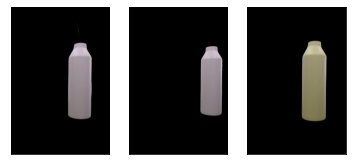

In [2]:
# test SiameseAlexnet

import torch
from util.trainingutil import (
    AlphaAlexNet,
    SiameseAlexNet,
    ParameterError,
    AlphaBgTransform,
    SiameseLoader,
)
from torchvision import transforms
import cv2
from pprint import pprint
from util.testutil import TestUtil

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SiameseAlexNet(device=device).to(device)
model.eval()
mode_saved_file = "./models/bottle_siamese.pth"
model.load_state_dict(torch.load(mode_saved_file))

image_name="./data/zerobox_nobg/images/white02/output0064.png"
image1 = cv2.imread(image_name)
image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

image_name2="./data/zerobox_nobg/images/white02/output0065.png"
image2 = cv2.imread(image_name2)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

image_name3="./data/zerobox_nobg/images/beige01/output0009.png"
image3 = cv2.imread(image_name3)
image3 = cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)

images = [image1,image2,image3]

TestUtil.plot_images(images)

output1 = model.predict(image1,image1)
output2 = model.predict(image1,image3)

pprint(output1)
pprint(output2)


# Opitimiae AlphaWeightedAlexNet

## Loss Function

```py
loss = F.mse_loss(output,labels)   # 76%
# loss = F.cross_entropy(output, labels) 27%
# loss = F.l1_loss(output,labels)  63%
```

```
# ms3_loss
Train Epoch: 20 [34560/34596 (100%)]	Loss: 0.140699
Test set: Average loss: 0.0008, Accuracy: 4248/5625 (76%)
Elapsed Time: 555.5833611488342 
```